In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (60000, 28, 28)
Shape of y_train : (60000,)
Shape of X_test : (10000, 28, 28)
Shape of y_test : (10000,)


In [4]:
def show_img(X, y, index):
  plt.matshow(X[index])
  plt.title("Class : " + str(y[index]))

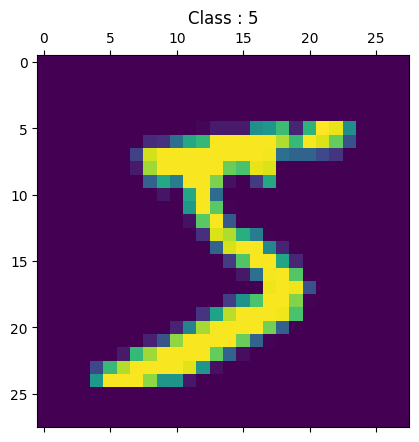

In [5]:
show_img(X_train, y_train, 0)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
ann = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
ann.fit(X_train, y_train, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8960 - loss: 0.3545
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9726 - loss: 0.0877
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9825 - loss: 0.0554
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9872 - loss: 0.0389
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9887 - loss: 0.0345
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9924 - loss: 0.0244
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9928 - loss: 0.0222
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9932 - loss: 0.0195
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9957 - loss: 0.0139
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9950 - loss: 0.0154
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9952 - loss: 0.0138
Epoch 12/50
1875/1875 ━━━━━━━━

In [10]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9810 - loss: 0.2013


[0.17716923356056213, 0.9836999773979187]

In [11]:
predictions = ann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
predictions = np.argmax(predictions, axis=1)

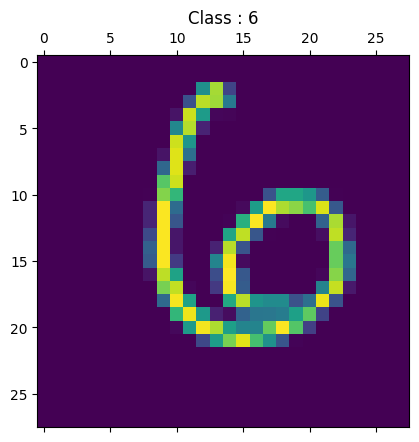

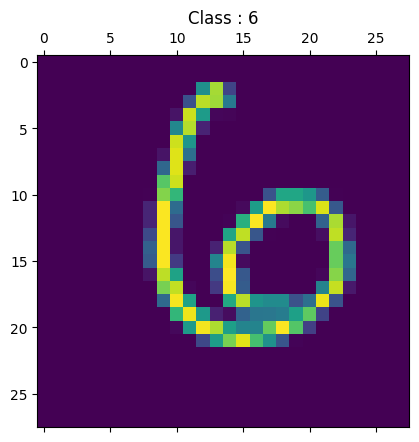

In [16]:
show_img(X_test, y_test, 100)
show_img(X_test, predictions, 100)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_test, predictions)

array([[ 973,    0,    0,    2,    0,    0,    3,    1,    1,    0],
       [   0, 1128,    2,    1,    0,    0,    1,    0,    3,    0],
       [   2,    0, 1023,    1,    0,    0,    0,    6,    0,    0],
       [   2,    0,    4,  993,    0,    1,    0,    4,    5,    1],
       [   1,    1,    4,    0,  962,    0,    3,    3,    2,    6],
       [   2,    0,    0,    9,    2,  871,    4,    0,    4,    0],
       [   2,    1,    1,    1,    1,    6,  943,    0,    3,    0],
       [   0,    2,   10,    0,    0,    0,    0, 1009,    2,    5],
       [   4,    2,    3,    4,    0,    3,    1,    4,  950,    3],
       [   2,    2,    0,    3,    8,    3,    1,    2,    3,  985]])

Text(95.72222222222221, 0.5, 'Truth')

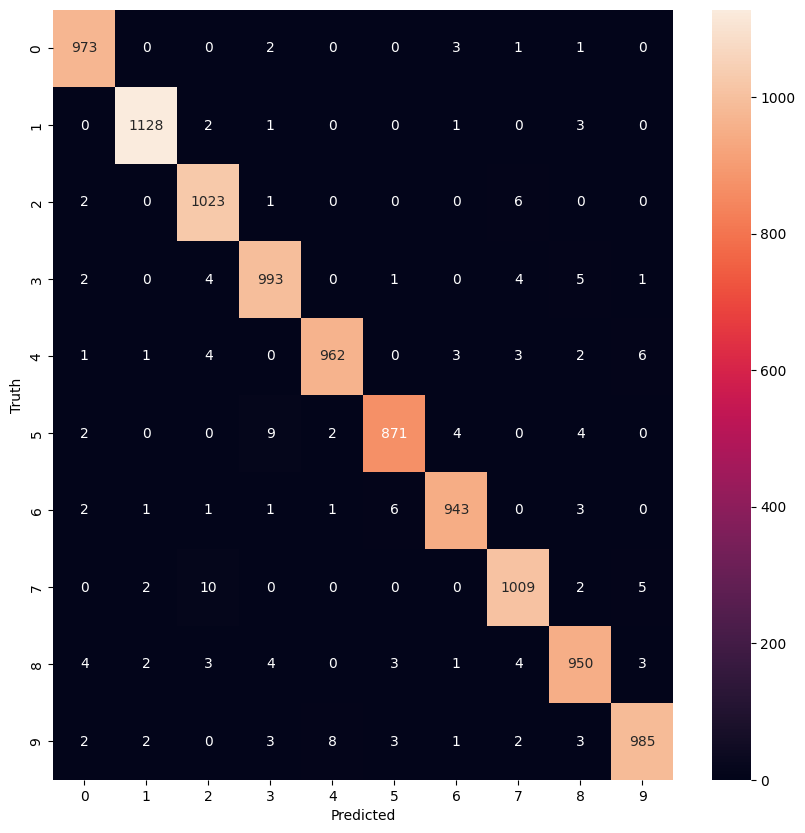

In [19]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
ann.save('image_recognition.h5')

In [21]:
from google.colab import files
files.download('image_recognition.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>